In [89]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import problexity as px

from sklearn.linear_model import LogisticRegression # Works
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Works
from sklearn.neighbors import KNeighborsClassifier # Works
from sklearn.naive_bayes import GaussianNB # Works
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, specificity_score

from sklearn.preprocessing import LabelEncoder
from numpy import average
from sklearn.multioutput import MultiOutputClassifier
from sklearn.exceptions import ConvergenceWarning
import warnings


le = LabelEncoder()

SEED = 42
DATA_STRUCTURE = json.load(open('data_structure.json'))
DATA_KEYS = list(DATA_STRUCTURE.keys())
CLASSIFIERS = {
  "GaussianNB":GaussianNB,
  "LinearDiscriminantAnalysis":LinearDiscriminantAnalysis,
  "KNeighborsClassifier":KNeighborsClassifier,
  "DecisionTreeClassifier":DecisionTreeClassifier,
  "LogisticRegression": LogisticRegression,
  # "SVC":SVC
  # Random forrest 
}
complexityDFColumns = ['dataset','t1','t2', 't3']
OUTPUT_COLS = ['dataset', 'target', 'target_name', 'avg_precision', 'precision_folds', 'avg_recall', 'recall_folds', 'avg_f1', 'f1_folds', 'avg_geometric_mean', 'geometric_mean_folds','avg_specificity','specificity_folds']

In [1]:
complexityDF = pd.read_csv(f'./out/complexityDF.csv', index_col=0)

plt.figure( dpi=100)

fig, axs = plt.subplots(4,3, constrained_layout=True)
fig.set_size_inches(10,10)
fig.suptitle('N3 Data Complexity Measures', fontsize=32, y=1.2)
fig.set_figwidth(30)
fig.set_figheight(8)

complexityDFColumns = ['dataset','t1','t2', 't3']
complexityDF.columns = complexityDFColumns
for row, data in complexityDF.iterrows():
  print(data[0])
  axs[row//3, row%3].bar(complexityDFColumns[1:],data.values[1:], capsize=6)
  axs[row//3, row%3].set_title(f'{data[0]}')
  axs[row//3, row%3].set_ylim([0, 1])


NameError: name 'pd' is not defined

['t1' 't1' 't2' 't3' 't1' 't1' 't3' 't1' 't2' 't2']
['mushroom' 'anuran' 'anuran' 'anuran' 'bank' 'intention' 'intention'
 'imdb' 'flight' 'intention']
------------------------------------------------
['t1' 't3' 't1' 't1' 't2' 't1' 't3' 't3' 't1' 't2']
['paris' 'imdb' 'census' 'flight' 'bank' 'telco' 'smoking' 'mushroom'
 'smoking' 'telco']
------------------------------------------------
['t3' 't3' 't2' 't2' 't3' 't3' 't2' 't2' 't3' 't2']
['flight' 'census' 'smoking' 'paris' 'paris' 'bank' 'census' 'imdb'
 'telco' 'mushroom']
------------------------------------------------


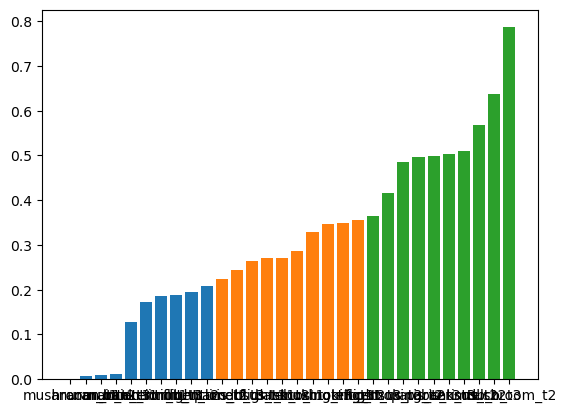

In [120]:
meltedComplexityDF = pd.melt(complexityDF, value_vars=['t1','t2', 't3'], var_name='Target', id_vars=['dataset'])

meltedComplexityDF= meltedComplexityDF.sort_values(by=['value'], ignore_index=True)
chunks = np.array_split(meltedComplexityDF, 3)
for i, chunk in enumerate(chunks):
  print(chunk['Target'].values)
  print(chunk['dataset'].values)
  labels = []
  for i in range(len(chunk['Target'].values)):
    labels.append(chunk['dataset'].values[i] + '_' +  chunk['Target'].values[i])
  


  plt.bar( labels, chunk['value'].values, width=0.8, bottom=None, align='center', data=None)
  print('------------------------------------------------')
